In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


x_to_y = defaultdict(list)
x = []
y = []
# Open and read the file
with open('delay.txt', 'r') as file:
    lines = file.readlines()

# Ensure the loop is reading correctly and appending values
for i in range(0, len(lines), 3):
    if i + 2 < len(lines):  # Check if the next two lines exist
        # Convert first two lines into float tuples
        a1 = [float(val) for val in lines[i].strip().split(',')]
        a2 = [float(val) for val in lines[i + 1].strip().split(',')]
        a3 = lines[i + 2].strip()  # Get the third line, size value (x)

        # Ensure a3 is not empty or malformed
        if a3 != '':
            a3 = int(a3)  # Convert the third value to float (x)

            # Calculate the differences between first and second line
            differences = tuple(first - second for first, second in zip(a1, a2))

            # Calculate the result (y value): a * 1000000 + b
            res = differences[0] * 1000000 + differences[1]
            
            # clear outliers
            if res >= 500 and res <= 3000:
                x.append(a3)
                y.append(res)




In [17]:
model = LinearRegression()


x = np.array(x).reshape(-1,1)
y = np.array(y)


# Remove the outliers from x and y

model.fit(x, y)

a = model.coef_[0]
b = model.intercept_

print("Linear Regression Parameters: ")
print(f"Slope (a): {1/a}")
print(f"Intercept (b): {b}\n")

print("Bandwidth/Delay calculation from parameters:")
print(f"Approixmated bandwidth: {8/a} Mbps")
print(f"Data size and transmission independent delay/propagation delay: {b} microsecond")

Linear Regression Parameters: 
Slope (a): 83.32019113027225
Intercept (b): 598.2424521854671

Bandwidth/Delay calculation from parameters:
Approixmated bandwidth: 666.561529042178 Mbps
Data size and transmission independent delay/propagation delay: 598.2424521854671 microsecond


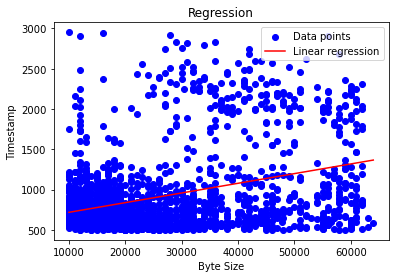

In [11]:
# Predict y values based on the fitted model
y_pred = model.predict(x)


plt.scatter(x, y, color='blue', label='Data points')

# Plot the linear regression line (fitted)
plt.plot(x, y_pred, color='red', label='Linear regression')

# Add labels and a title
plt.xlabel('Byte Size')
plt.ylabel('Timestamp')
plt.title('Regression')

# Display the legend
plt.legend()
plt.show()